<a href="https://colab.research.google.com/github/luiscunhacsc/finance_python/blob/main/18_Risk_and_Return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Risk and Return

### Definition:
Risk and return are fundamental concepts in finance. **Risk** refers to the potential for losing some or all of an investment. **Return** is the gain or loss generated by an investment over a particular period. The **Purpose** of analyzing risk and return is to assess the trade-off between them to make informed investment decisions. **Importance**: Balancing risk and return is crucial for optimizing investment portfolios.


### Measuring Return

The return on an investment can be measured in several ways:

- **Absolute Return**: $ R = \frac{P_{end} - P_{start}}{P_{start}} $

- **Annualized Return**: $ R_{\text{annual}} = \left(1 + R\right)^\frac{1}{n} - 1 $

- **Average Return**: $ R_{\text{avg}} = \frac{1}{n} \sum_{i=1}^{n} R_i $

Types of Returns:
- **Total Return**: Includes capital gains and dividends.
- **Real Return**: Adjusted for inflation.
- **Nominal Return**: Not adjusted for inflation.


### Practical Example: Calculating Returns

**Scenario**: Calculate the absolute, annualized, and average returns for a stock.

**Steps**:
1. Load historical stock price data.
2. Calculate absolute, annualized, and average returns.
3. Visualize the returns.


In [ ]:
%pip install -q yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
start="2015-01-01"
end="2024-06-01"

[*********************100%%**********************]  1 of 1 completed

Absolute Return: 6.8784
Annualized Return: 0.2453
Average Return: 0.0010


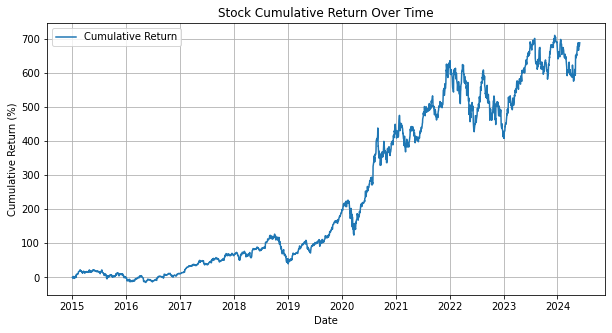

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical stock price data for Apple (AAPL)
data = yf.download('AAPL', start=start, end=end)
prices = data['Adj Close']

# Calculate absolute return
absolute_return = (prices[-1] - prices[0]) / prices[0]

# Calculate annualized return
years = (prices.index[-1] - prices.index[0]).days / 365.25
annualized_return = (1 + absolute_return) ** (1 / years) - 1

# Calculate average return
returns = prices.pct_change().dropna()
average_return = returns.mean()

# Print results
print(f"Absolute Return: {absolute_return:.4f}")
print(f"Annualized Return: {annualized_return:.4f}")
print(f"Average Return: {average_return:.4f}")

# Visualize returns
plt.figure(figsize=(10, 5))
plt.plot(prices.index, (prices / prices.iloc[0] - 1) * 100, label='Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.title('Stock Cumulative Return Over Time')
plt.legend()
plt.grid(True)
plt.show()


### Measuring Risk

Risk can be measured using the following metrics:

- **Standard Deviation**: Measures the dispersion of returns from the mean.

  $ \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (R_i - \bar{R})^2} $

- **Variance**: The square of the standard deviation.

  $ \text{Variance} = \sigma^2 $

- **Beta**: Measures the sensitivity of a stock's returns to market returns.

  $ \beta = \frac{\text{Cov}(R_i, R_m)}{\text{Var}(R_m)} $

- **Value at Risk (VaR)**: Estimates the potential loss in value of an asset or portfolio.


### Practical Example: Calculating Risk

**Scenario**: Calculate standard deviation, variance, beta, and VaR for a stock.

**Steps**:
1. Load historical stock and market return data.
2. Calculate standard deviation, variance, beta, and VaR.
3. Visualize the risk metrics.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Stock Standard Deviation: 0.0181
Stock Variance: 0.0003
Market Standard Deviation: 0.0114
Market Variance: 0.0001
Beta: 1.2016
Value at Risk (95%): -0.0271


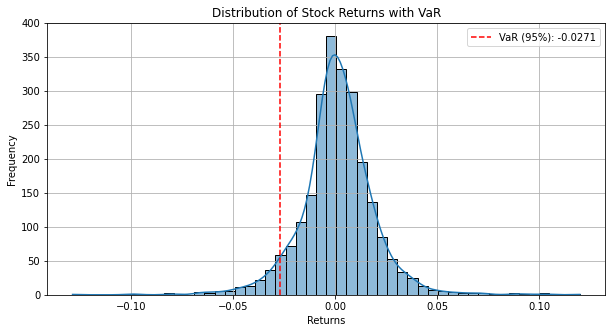

In [ ]:
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Download historical data for Apple (AAPL) and S&P 500 (^GSPC)
stock_data = yf.download('AAPL', start=start, end=end)
market_data = yf.download('^GSPC', start=start, end=end)

# Calculate daily returns
stock_data['Stock Return'] = stock_data['Adj Close'].pct_change()
market_data['Market Return'] = market_data['Adj Close'].pct_change()

# Drop NaN values
stock_returns = stock_data['Stock Return'].dropna()
market_returns = market_data['Market Return'].dropna()

# Calculate standard deviation and variance
stock_std_dev = stock_returns.std()
stock_variance = stock_returns.var()
market_std_dev = market_returns.std()
market_variance = market_returns.var()

# Calculate beta
covariance = np.cov(stock_returns, market_returns)[0][1]
beta = covariance / market_variance

# Calculate VaR (95% confidence level)
VaR_95 = stock_returns.quantile(0.05)

# Print results
print(f"Stock Standard Deviation: {stock_std_dev:.4f}")
print(f"Stock Variance: {stock_variance:.4f}")
print(f"Market Standard Deviation: {market_std_dev:.4f}")
print(f"Market Variance: {market_variance:.4f}")
print(f"Beta: {beta:.4f}")
print(f"Value at Risk (95%): {VaR_95:.4f}")

# Visualize risk metrics
plt.figure(figsize=(10, 5))
sns.histplot(stock_returns, bins=50, kde=True)
plt.axvline(x=VaR_95, color='red', linestyle='--', label=f'VaR (95%): {VaR_95:.4f}')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Returns with VaR')
plt.legend()
plt.grid(True)
plt.show()



## Analysis of Risk Metrics for Apple (AAPL) and S&P 500 (^GSPC)

### 1. Stock Standard Deviation
- **Value:** `0.0181`
- **Interpretation:** The daily standard deviation of returns for Apple (AAPL) is 1.81%. This indicates that Apple's returns typically fluctuate by about 1.81% from the average return on a daily basis. This level of volatility is common for individual large-cap stocks like Apple.

### 2. Stock Variance
- **Value:** `0.0003`
- **Interpretation:** Variance represents the dispersion of returns and is the square of the standard deviation. The small value reflects that this is based on daily data. When annualized, the variance would be larger, representing more significant deviations over a longer period.

### 3. Market Standard Deviation
- **Value:** `0.0114`
- **Interpretation:** The daily standard deviation of the S&P 500 (^GSPC) returns is 1.14%. The market generally has lower volatility compared to individual stocks, which is reflected in this lower standard deviation.

### 4. Market Variance
- **Value:** `0.0001`
- **Interpretation:** Like the stock variance, the market variance is small because it's based on daily data. If annualized, the variance would be more substantial, providing a broader perspective on market risk.

### 5. Beta
- **Value:** `1.2016`
- **Interpretation:** Beta measures the sensitivity of Apple’s returns to the market’s returns. A beta of 1.2016 indicates that Apple is slightly more volatile than the market; for every 1% change in the market, Apple's return is expected to change by approximately 1.2016%. This suggests that Apple carries higher systematic risk compared to the broader market.

### 6. Value at Risk (VaR) - 95% Confidence Level
- **Value:** `-0.0271`
- **Interpretation:** The VaR indicates that, with 95% confidence, the worst expected daily loss for Apple is around 2.71%. This means that on 95% of trading days, the loss should not exceed 2.71%. VaR is a commonly used risk metric to understand potential losses, particularly in volatile markets.

### Visualization: Distribution of Stock Returns with VaR
The histogram visualizes the distribution of daily returns for Apple, with a vertical red line marking the VaR at the 95% confidence level. The visualization shows that most returns are clustered around zero (representing small gains or losses), but there is a small tail to the left, representing larger losses, where the VaR line is placed.

### Conclusion
- **The results are sensible:** They reflect Apple's relatively high volatility compared to the market, with a beta slightly above 1, indicating a higher risk but potentially higher return profile relative to the market.
- **VaR is appropriately calculated:** It provides a realistic measure of potential downside risk over a single day, indicating that 95% of the time, losses should not exceed 2.71%.

This analysis helps in understanding the risk-return profile of investing in Apple compared to the broader market. For a more comprehensive assessment, extending the analysis over a longer period or exploring different confidence levels for VaR might be beneficial, as financial markets can be very volatile, and short-term data may not capture all risks.


### Risk-Return Trade-off

**Concept**: Higher potential returns are associated with higher risk.

- **Efficient Frontier**: A set of optimal portfolios that offer the highest expected return for a given level of risk.
- **Sharpe Ratio**: Measures the risk-adjusted return of an investment.

  $ \text{Sharpe Ratio} = \frac{\bar{R} - R_f}{\sigma} $

  Where:
  - $ \bar{R} $: Average return
  - $ R_f $: Risk-free rate
  - $ \sigma $: Standard deviation


### Practical Example: Calculating the Sharpe Ratio

**Scenario**: Calculate and visualize the Sharpe Ratio for a stock.

**Steps**:
1. Load historical stock return data.
2. Calculate the average return, risk-free rate, and standard deviation.
3. Compute the Sharpe Ratio.
4. Visualize the risk-return trade-off.


**Apple (AAPL) Sharpe Ratio Analysis**
Annualized Return: 0.2612
Annualized Standard Deviation (Risk): 0.2878
Sharpe Ratio: 0.8727

**S&P 500 (^GSPC) Sharpe Ratio Analysis**
Annualized Return: 0.1166
Annualized Standard Deviation (Risk): 0.1806
Sharpe Ratio: 0.5902


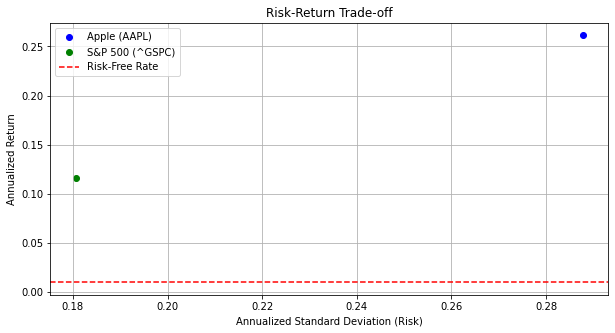

In [ ]:
# Annualization factor (assuming 252 trading days in a year)
annualization_factor = 252

# Annualize the returns
stock_annual_return = stock_returns.mean() * annualization_factor
market_annual_return = market_returns.mean() * annualization_factor

# Annualize the standard deviation (Risk)
stock_annual_std_dev = stock_std_dev * np.sqrt(annualization_factor)
market_annual_std_dev = market_std_dev * np.sqrt(annualization_factor)

# Calculate Sharpe Ratios
stock_sharpe_ratio = (stock_annual_return - risk_free_rate) / stock_annual_std_dev
market_sharpe_ratio = (market_annual_return - risk_free_rate) / market_annual_std_dev

# Print results
print("**Apple (AAPL) Sharpe Ratio Analysis**")
print(f"Annualized Return: {stock_annual_return:.4f}")
print(f"Annualized Standard Deviation (Risk): {stock_annual_std_dev:.4f}")
print(f"Sharpe Ratio: {stock_sharpe_ratio:.4f}")

print("\n**S&P 500 (^GSPC) Sharpe Ratio Analysis**")
print(f"Annualized Return: {market_annual_return:.4f}")
print(f"Annualized Standard Deviation (Risk): {market_annual_std_dev:.4f}")
print(f"Sharpe Ratio: {market_sharpe_ratio:.4f}")

# Visualize risk-return trade-off
plt.figure(figsize=(10, 5))
plt.scatter(stock_annual_std_dev, stock_annual_return, marker='o', color='blue', label='Apple (AAPL)')
plt.scatter(market_annual_std_dev, market_annual_return, marker='o', color='green', label='S&P 500 (^GSPC)')
plt.axhline(y=risk_free_rate, color='red', linestyle='--', label='Risk-Free Rate')
plt.xlabel('Annualized Standard Deviation (Risk)')
plt.ylabel('Annualized Return')
plt.title('Risk-Return Trade-off')
plt.legend()
plt.grid(True)
plt.show()



## Sharpe Ratio Analysis: Apple (AAPL) vs. S&P 500 (^GSPC)

### 1. Apple (AAPL) Sharpe Ratio Analysis
- **Annualized Return:** `0.2612`
  - **Interpretation:** Apple's annualized return is 26.12%. This is a measure of the overall return you would expect to receive from investing in Apple over one year, considering both price appreciation and dividends.
  
- **Annualized Standard Deviation (Risk):** `0.2878`
  - **Interpretation:** The annualized standard deviation of returns, also known as volatility, is 28.78%. This indicates that Apple's returns fluctuate significantly, which is typical for individual stocks. The higher the standard deviation, the higher the risk.
  
- **Sharpe Ratio:** `0.8727`
  - **Interpretation:** The Sharpe ratio for Apple is 0.8727. This indicates that for every unit of risk (standard deviation), Apple provides a return of approximately 0.87 units above the risk-free rate. A Sharpe ratio above 1 is generally considered good, so while Apple's Sharpe ratio is below 1, it still indicates that the returns are fairly compensating for the risk taken.

### 2. S&P 500 (^GSPC) Sharpe Ratio Analysis
- **Annualized Return:** `0.1166`
  - **Interpretation:** The S&P 500's annualized return is 11.66%. This is the expected return from investing in the broader market over one year, providing a benchmark for comparison with individual stocks like Apple.

- **Annualized Standard Deviation (Risk):** `0.1806`
  - **Interpretation:** The market's annualized standard deviation is 18.06%. The S&P 500 generally has lower volatility compared to individual stocks, indicating that the overall market is less risky than individual stocks like Apple.

- **Sharpe Ratio:** `0.5902`
  - **Interpretation:** The Sharpe ratio for the S&P 500 is 0.5902. While this is lower than Apple's Sharpe ratio, it still suggests that the market offers returns above the risk-free rate, though with less reward per unit of risk compared to Apple.

### 3. Risk-Return Trade-off Visualization
The scatter plot shows the risk-return trade-off for Apple (AAPL) and the S&P 500 (^GSPC):

- **Apple (AAPL):** Represented by a blue dot, located at higher risk (standard deviation) and higher return compared to the S&P 500. This reflects Apple's higher volatility but also its potential for greater returns.
  
- **S&P 500 (^GSPC):** Represented by a green dot, located at lower risk and lower return compared to Apple. This is typical for a diversified market index, which tends to have lower volatility and steady returns.
  
- **Risk-Free Rate:** Represented by a red dashed line, indicating a return of 1% with no risk. Investments with higher risk should provide returns higher than this line to be considered efficient.

### Conclusion
- **Apple vs. Market:** Apple's higher Sharpe ratio indicates that, despite its higher volatility, it provides a better risk-adjusted return compared to the broader market. However, this comes with greater risk, as shown by its higher standard deviation.
- **Investment Implication:** If you're seeking higher returns and are willing to take on more risk, Apple may be a better investment than the broader market. However, for those who prefer lower risk, investing in the S&P 500 offers a safer, albeit lower return option.

This analysis helps compare the risk and return profile of an individual stock versus the market, providing insight into the potential trade-offs involved in different investment choices.
